## Step-by-step explanation on the radial inflow turbine preliminary design tool

#### In this explanation, **Turbine T-3** of the hydrogen Claude-cyle liquefier from the paper is taken as an example.  

1. The first step is creating a turbine object for the first compressor in the series using the "turbine" class from the turbine.py source code:

In [3]:
import turbine

class Format:
    end = '\033[0m'
    underline = '\033[4m'

fluid   = "REFPROP::HYDROGEN" # The working fluid will be hydrogen and its properties will be taken from REFPROP

# T-3 known inlet and outlet conditions
T_in    = 111.990 #K   # Inlet temperature
P_in    = 29.4800 #bar # Inlet pressure
P_out   = 7.6990  #bar # Outlet pressure

m       = 16994.614/3600 #kg/s # Mass-flow

Turbine3 = turbine.Turbine(fluid, T_in, P_in, P_out, m) #Turbine3 is now a "turbine" object

In [4]:
Turbine3.initialSpec() # This function prints out the initially known parameters of the turbine

TURBO-EXPANDER INITIAL SPECIFICATION INITIAL SPECIFICATION
Fluid: HYDROGEN
Mass flow [kg/s] : 4.7207

Inlet Condition
P [bar]     =  29.48
T [Kelvin]  =  111.99
H [kJ/kg]   =  1410.726
S [kJ/kg.K] =  26.3


Isentropic Outlet Condition
P [bar]     =  7.699
T [Kelvin]  =  67.12
H [kJ/kg]   =  927.392
S [kJ/kg.K] =  26.3


Δh_is [kJ/kg]  =  483.334
Power_is [kW]  = 2281.689


2. We then impose a constraint on the impeller tip-speed velocity, as a design constraint, to determine the minimum number of radial (expansion) stages are required by your turbine. In this case, we restrict maximum tip-speed velocity to 500 m/s.

In [6]:
# Design constraint
u1_max  = 500 #m/s  # Maximum tip speed velocity

Turbine3.noOfStages(u1_max) # This function gives you the required minimum and maximum number of stages of your turbine.

Mininum and Maximum Number of Stage
Wheel Tip Velocity [m/s]  =  500
Δh_max/stage [kJ/kg] =  255.102
Min. number of stage =  2
Max. number of stage =  4


3. Since the design limitations for turbine in this study (Table 3) dictate that one turbine unit can only have one expansion stage, a minimum number of stages of two means that two turbine units configured in series is required.

In [4]:
Turbine3.rotationalSpeedRange() # This function gives you the minimum and maximum rotational speed of the turbine based on
# optimum specific speed range of radial inflow turbines (0.4 < omega_s < 0.8)

Minimum & Maximum Rotational Speed
Min. RPM =  26399.542
Max. RPM =  64629.734


Rotational Speed Selection Plot 

Specific speed range for radial compressor is between 0.4-0.8


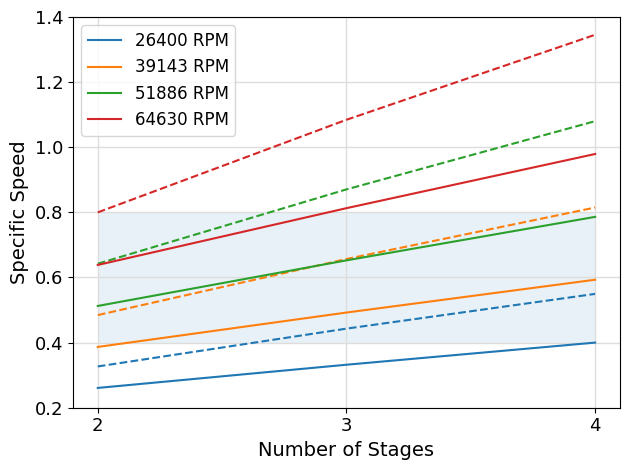

In [5]:
Turbine3.nzSelectionPlot() # This function creates the n-z selection plot based on the previous results

4. After you get the n-z plot, you need to make a selection for the combination of rotational speed (RPM) and number of stages (units in series) of the turbine. The pair values should lie in the blue shaded area of the plot. The best combination should give you a high stage efficiency and stage design parameters that are within or not too far (10%) from the parameter constraints (recommended values for optimum design - **Table 4**).

In [10]:
# Check the results of the stage (turbine unit) calculations using the following function.

Turbine3.stagesCalculation(41500, 2, True) # 41500 is the selected RPM, while 2 is the selected number of stages;
# the "True" value turn on the warnings if there are stage parameters that are not meeting the parameter constraints

Stage 1
Delta enthalpy [kJ/kg]:212.23
Expansion ratio:1.79
Power [kW]:1001.87
Thermodynamic Parameters:
{'Stage inlet volumetric [m3/h]': 2683.47,
 'Stator outlet pressure [bar]': 21.45,
 'Stator outlet temperature [℃]': -171.97,
 'Rotor outlet pressure [bar]': 16.48,
 'Rotor outlet temperature [℃]': -180.33,
 'Total-to-static efficiency [%]': 85.04,
 'Isentropic efficiency [%]': 87.9}
Geometric Parameters:
{'Rotor tip diameter ratio': 0.564,
 'Rotor hub diameter ratio': 0.185,
 'Stator inlet diameter [cm]': 26.12,
 'Rotor inlet diameter [cm]': 19.73,
 'Rotor outlet diameter [cm]': 11.12,
 'Blade height at rotor inlet  [cm]': 1.28,
 'Blade height at rotor outlet  [cm]': 3.74}
Kinematic Parameters:
{'Velocities [m/s]': {'Absolute meridional rotor inlet': 116.0,
                      'Absolute tangential rotor inlet': 495.0,
                      'Absolute rotor inlet': 508.4,
                      'Absolute tangential rotor outlet': 0.0,
                      'Absolute meridional rotor 

5. Once you are satisfied with the turbine parameter calculations results, you can use below function to print out a summary of your turbine series:

In [11]:
Turbine3.turbDictionary()

RADIAL INFLOW TURBINE FINAL SPECIFICATION
{'Fluid': 'HYDROGEN',
 'Mass flow [kg/s]': 4.720726111111111,
 'Turbine type': 'Radial inflow turbine',
 'Rotational speed [RPM]': 41500,
 'Number of stages': 2,
 'Max. tip velocity [m/s]': 500,
 'Inlet pressure [bar]': 29.48,
 'Inlet temperature [C]': -161.16,
 'Inlet volumetric [m3/h]': 2683.47,
 'Delta enthalpy [kJ/kg]': 437.59,
 'Expansion ratio': 0.26,
 'Turbine power [kW]': 2065.76,
 'Turb. Isentropic eff. [%]': 90.54,
 'Turb. Polytropic eff. [%]': 87.7}
